# Access to Data

This tutorial is showing some options to access data, stored in accessable data archives. 

## ESGF Archive 

Acess to CMIP6 data with subset selection for the coordinates of Paris

The code is oriented from https://esgf-pyclient.readthedocs.io/en/latest/notebooks/demo/subset-cmip6.html

### Search data 

In [1]:
# ESGF can be directly connected with the python client pyesgf
# loading the client:
from pyesgf.search import SearchConnection

# connection to one of the ESGF Nodes
conn = SearchConnection('https://esgf-node.ipsl.upmc.fr/esg-search', distrib=False) # set distrib=True if you want to search all nodes

# other nodes are: 
# https://esgf-data.dkrz.de/esg-search

In [2]:
# search of a set of temperature files
ctx = conn.new_context(project='CMIP6', query='tas', frequency='day', experiment_id='ssp585')

print('Number of data sets found: {}'.format(ctx.hit_count))

# other querry options might be: 
# experiment_id = ['ssp126', 'ssp245', 'ssp370', 'ssp460','ssp585', 'historical', 'ssp119', 'ssp434']
# query = [ 'tas', 'tasmin', 'tasmax', 'pr', 'sfcWind' ] # 

Number of data sets found: 20


In [3]:
# getting some more infos of the datasets found:
for result in ctx.search():
    print(result.dataset_id)

CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.day.tas.gr.v20190614|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r2i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r14i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r4i1p1f1.day.tas.gr.v20191122|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r6i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.day.tas.gr.v20190903|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-CM6-1.ssp585.r1i1p1f2.day.tas.gr.v20190219|esg1.umr-cnrm.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r5i1p1f2.day.tas.gr.v20190410|esg1.umr-cnrm.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r4i1p1f2.day.tas.gr.v20190410|esg1.umr-cnrm.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r1i1p1f2.day.tas.gr.v2

Data sets can consist of multiple files. Each file have an own url to be findable and accessable

In [4]:
# print out the url locations
for i in ctx.search():
    files = i.file_context().search()
    for file in files:
        print(file.opendap_url)

http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r2i1p1f1/day/tas/gr/v20191121/tas_day_IPSL-CM6A-LR_ssp585_r2i1p1f1_gr_20150101-21001231.nc
http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r14i1p1f1/day/tas/gr/v20191121/tas_day_IPSL-CM6A-LR_ssp585_r14i1p1f1_gr_20150101-21001231.nc
http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r4i1p1f1/day/tas/gr/v20191122/tas_day_IPSL-CM6A-LR_ssp585_r4i1p1f1_gr_20150101-21001231.nc
http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r6i1p1f1/day/tas/gr/v20191121/tas_day_IPSL-CM6A-LR_ssp585_r6i1p1f1_gr_20150101-21001231.nc
http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/day/tas/gr/v20190903/tas_day_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_20150101-21001231.nc
http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/day/tas/gr/v20190903/tas_day_IPSL-CM6A-LR_

### Access Data

In [5]:
# access the metadata 
import xarray as xr
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
print(ds)

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, time: 31411)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height       float64 ...
  * time         (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(120, 2), meta=np.ndarray>
    tas          (time, lat, lon) float32 dask.array<chunksize=(120, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.7 CMIP-6.2
    creation_date:                   2020-04-25T20:37:42Z
    description:                     Future scenario with high radiative forc...
    title:                           CNRM-ESM2-1 model output prepared for CM...
    activity_id:                     ScenarioMIP
    contact:                       

In [6]:
# select the area of Paris, due to the low resolution of CMIP6 it will result in just one grid-point
da = ds['tas']
# da = da.isel(time=slice(0, 1000)) # fetching just the first 1000 days
da = da.sel(lat=slice(2, 3), lon=slice(47, 49))

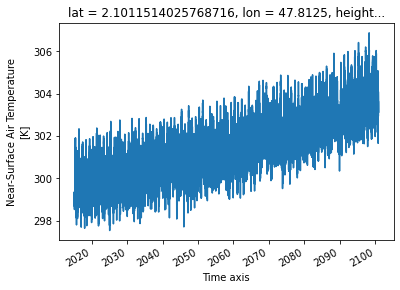

In [7]:
# Plot the timeseries
%matplotlib inline
da.plot()

In [10]:
# convert from Kelvin to Celcius
tem_C = da[:] - 273.15

In [9]:
# import a plotting library 
from matplotlib import pyplot as plt


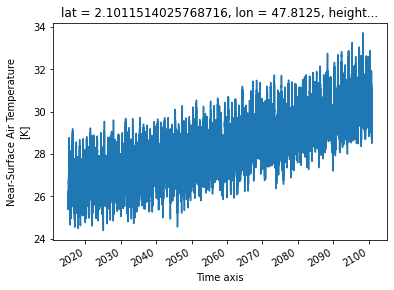

In [26]:
# from numpy import squeeze 
# squeeze(da.values)
da.values = da.values - 273.15
# plot the temperature in celsius
# plt.plot(tem_C)

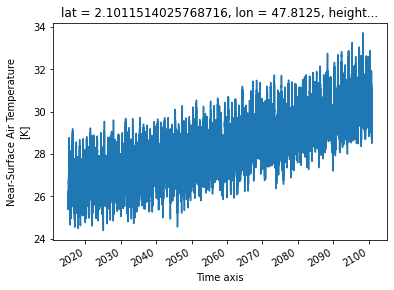

In [27]:
da.plot()

In [31]:
# to explore the data according to the choosen query:
da

<xarray.DataArray 'tas' (time: 31411, lat: 1, lon: 1)>
dask.array<getitem, shape=(31411, 1, 1), dtype=float32, chunksize=(120, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 2.101
  * lon      (lon) float64 47.81
    height   float64 ...
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella
    _ChunkSizes:         [  1 128 256]

In [15]:
da.to_netcdf('~/data/testforparis_2015-2100.nc')

In [16]:
files[0].file_id

'CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r2i1p1f2.day.tas.gr.v20190410.tas_day_CNRM-ESM2-1_ssp585_r2i1p1f2_gr_20150101-21001231.nc|esg1.umr-cnrm.fr'

In [17]:
import xclim 

  warnings.warn(



In [37]:
meanTemp = xclim.indices.tg_mean(da)

The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(



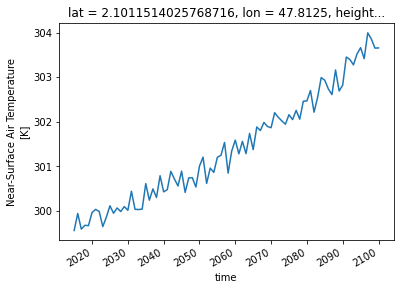

In [38]:
# yearly mean 
meanTemp.plot()